In [1]:
from twod_diskmodel import *
# Check if it is office computer or laptop and set path of imfits accordingly
# Office computer
if current_path.split(sep=":")[0].lower() == "d":
    sys.path.append("d:\L1489_IRS_ssp\imfits")
else:  # Laptop N
    sys.path.append("E:/Mihir_new/ASIAA-SSP/imfits/")
from imfits import Imfits
from imfits.drawmaps import AstroCanvas
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

d:\L1489_IRS_ssp\DiskModel


In [2]:
%matplotlib widget

The third axis is  FREQ
Convert frequency to velocity
(89401,) <class 'numpy.ndarray'>
Inside gauss ring Imax of ss disk,  341304.2491089977  location =  100
(89401,) <class 'numpy.ndarray'>
plotting intensity


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


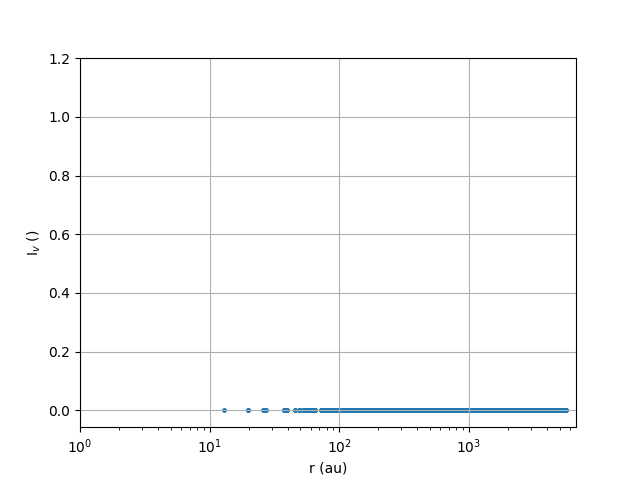

In [3]:
Ic, rc, beta, gamma, r_ring = [1., 600., 0.5, 1., 180.] # rc 
inc = 73.
pa = 69.
ms = 1.6
vsys = 7.3
r_ring = 200.


model = SSDisk(Ic, rc, beta, gamma, inc, pa, ms, vsys, r_ring = 100, ring_peak = 0.9, ring_width = 20.)

# object
f_cube = 'uid___A002_b_6.cal.l1489_irs.spw_1_7.line.cube.clean.c_baseline_0.image.pbcor.Regridded.Smoothened.fits'
dist = 140.
f_PV = 'uid___A002_b_6.cal.l1489_irs.spw_1_7.line.cube.clean.c_baseline_0.image.pbcor.Regridded.Smoothened.PV_69_w1.fits'

# --------- main ----------
# read fits file
cube = Imfits(f_cube)
cube.trim_data([-9., 9.,], [-9.,9.])   # trim_data([RA range in arcsec offset from center], [Dec range], [offset velocity range in kmps])

xx = cube.xx * 3600. * dist # in au
yy = cube.yy * 3600. * dist # in au
v = cube.vaxis[3:] # km/s

modelcube = model.build_cube(xx, yy, v, cube.beam, linewidth=0.7, dist=dist, profile_type='gauss_ring',
                            plot_intensity=True)
vmin, vmax = np.nanmin(modelcube)*0.5, np.nanmax(modelcube)*0.5

In [4]:
# Let's get PV plot out of the modelcube  
print(np.shape(modelcube))
pv_model = np.squeeze(modelcube[:, :, 150])

print("Shape of pv model",np.shape(pv_model))

# plot modelcube on top of observed cube (as contours)

plot_cube = True

if plot_cube:
    canvas = AstroCanvas((7,10),(0,0), imagegrid=True)
    canvas.channelmaps(cube, contour=True, color=False,
                       nskip=0,
                        imscale = [-4, 4, -4, 4],
                        coord_center='04h04m43.07s 26d18m56.30s',
                        clevels = np.array([-3, 3.,6.,9.,12.,15])*7e-3)

    for i, im in enumerate(modelcube):      #   Plotting model as image as raster modelcube[::1,:,:]

        if i < len(canvas.axes):
            ax = canvas.axes[i]
            im = im[:-1, :-1]
            ax.pcolormesh(xx / dist, yy / dist, im, shading='auto', rasterized=True,
                vmin = vmin, vmax = vmax, cmap='PuBuGn')
        else:
            break
    
    plt.show()

plot_PV = False
if plot_PV:

    pv_obs = Imfits(f_PV, pv=True)

    print("Shape of observed pv", np.shape(pv_obs.data))
    rms_pv = pv_obs.estimate_noise()

    canvas = AstroCanvas((1,1))
    pv_plot = canvas.pvdiagram(pv_obs,
                vrel = True,
                color = False,
                #cmap = 'inferno',
                vmin = -2.0,
                vmax = 14.0,
                contour = True,
                clip = 0.0000000,
                #ylim = [-8.5,6.5],
                clevels = np.array([3,7,10,15,25,35,45])*rms_pv,
                x_offset = True, # If true, offset (radial distance from star) will be the x axis
                vsys = 7.2, # systemic velocity in kmps
                ln_var = True, # plot vertical center (systemic velocity)
                ln_hor = True, # plot horizontal center (zero offset)
                #cbaroptions = ('right', '3%', '3%'),
                #cbarlabel = r'(Jy beam$^{-1})$',
                colorbar = False 
                )


    X, Y = np.meshgrid(yy[:,0]/(dist), -v+8.)
    print(np.shape(X))
    print(np.shape(Y))
    ax = canvas.axes[0]
    ax.pcolormesh(X, Y, pv_model, shading='auto', rasterized=True,
                    cmap='PuBuGn')
    #plt.xlim(-14,14)
    #plt.ylim(-14,14)
    plt.show()

(67, 299, 299)
Shape of pv model (67, 299)
Draw channel maps...


KeyboardInterrupt: 